# Using the MNIST Dataset to recognize digits

In [141]:
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import gzip
import pickle

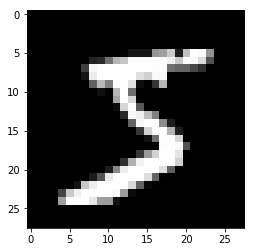

In [142]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='iso-8859-1')

train_x, train_y = train_set

plt.imshow(train_x[0].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()


In [143]:
#input array
x = []

#expected output
y = []

#Learning rate
lr = 0.1

In [148]:
#create a neural network class
class nn(object):
    def __init__ (self):
        self.inSize = 784
        self.hiddenSize = 15
        self.outSize = 10
            
        #randomly initialize the weights
        self.ihW = np.random.rand(self.inSize, self.hiddenSize)
        self.hBias = np.random.rand(1,self.hiddenSize)
        self.hoW = np.random.rand(self.hiddenSize, self.outSize)
        self.oBias = np.random.rand(1,self.outSize)
        
    def forwardprop(self, inp):
        self.zt = np.dot(inp, self.ihW)
        self.z = self.zt + self.hBias
        self.z2 = self.sigmoid(self.z)
        self.z3t = np.dot(self.z2, self.hoW)
        self.z3 = self.z3t + self.oBias
        final = self.sigmoid(self.z3)
        return final
    
    def sigmoid(self,z):
        return (1 / (1 + np.exp(-z)))
    
    def sigmoid_prime(self,z):
        return z*(1-z)
    
    def backprop(self, diff, output, x):
        self.delta = diff*self.sigmoid_prime(output)
        self.zSquareError = np.dot(self.delta, self.hoW.T)
        self.deltaZSquare = self.zSquareError*self.sigmoid_prime(self.z2)
        self.ihW += x.T.dot(self.deltaZSquare)*lr
        self.hoW += self.z2.T.dot(self.delta)*lr
        self.hBias += np.sum(self.deltaZSquare, axis = 0, keepdims = True)*lr
        self.oBias += np.sum(self.delta, axis = 0, keepdims = True)*lr



In [149]:
def toProbs(i):
    probabilities = np.zeros((10,1))
    probabilities[i] = 1
    return probabilities

In [150]:
def guess(output):
    return np.argmax(output)

In [151]:
yhat = []

for i in range(0, ((train_x).shape[0])):
    x = train_x[i]
    NeuralNet = nn()
    output = NeuralNet.forwardprop(train_x)
    #output = NeuralNet.forwardprop(x)
    yhat = np.append(yhat,guess(output))
    y = np.append(y, train_y[i])
    
    yProb = toProbs(train_y[i])
    difference = train_y-yhat
    print(difference)
    #difference = yProb - output
    NeuralNet.backprop(difference, yhat, train_x)
    #NeuralNet.backprop(difference, output, x)
    print(i)
    

[ 0. -5. -1. ...  3. -1.  3.]
(50000,)


ValueError: shapes (50000,) and (10,15) not aligned: 50000 (dim 0) != 10 (dim 0)